## Problem 1

- Ahmed Ibrahim

In [148]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime

In [149]:
# Given data
current_stock_price = 165
current_date = datetime(2023, 3, 3)
expiration_date = datetime(2023, 3, 17)
risk_free_rate = 0.0525
coupon = 0.0053  # Continuously Compounding Coupon

# Calculate time to maturity in calendar days
time_to_maturity = (expiration_date - current_date).days

print(f"Time to maturing: {time_to_maturity} days")

Time to maturing: 14 days


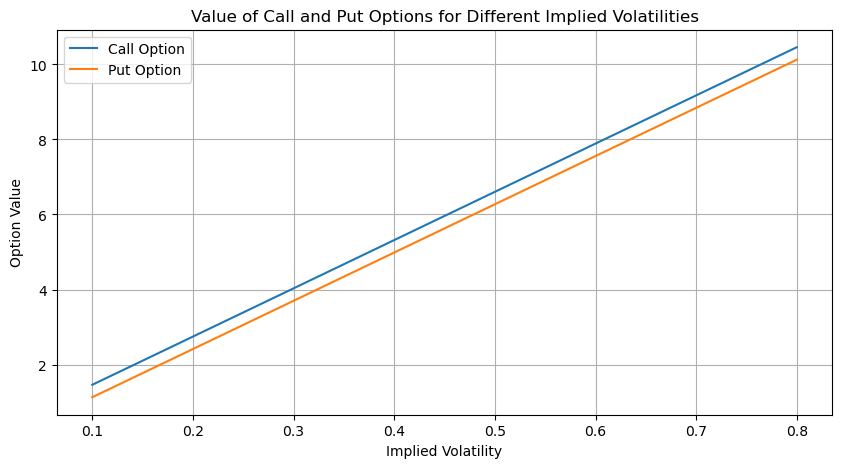

In [150]:
# Function to calculate Black-Scholes call and put option values
def black_scholes(S, K, T, r, q,sigma, option_type='call'):
    d1 = (np.log(S / K) + (r -q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_value = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_value = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return option_value

# Range of implied volatilities from 10% to 80%
implied_volatilities = np.linspace(0.10, 0.80, 100)

# Calculate option values for different implied volatilities
call_values = []
put_values = []

for sigma in implied_volatilities:
    call = black_scholes(current_stock_price, current_stock_price, time_to_maturity/365, risk_free_rate, coupon, sigma, 'call')
    put = black_scholes(current_stock_price, current_stock_price, time_to_maturity/365, risk_free_rate, coupon, sigma, 'put')
    call_values.append(call)
    put_values.append(put)

# Plot the graphs
plt.figure(figsize=(10, 5))
plt.plot(implied_volatilities, call_values, label='Call Option')
plt.plot(implied_volatilities, put_values, label='Put Option')
plt.title('Value of Call and Put Options for Different Implied Volatilities')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Value')
plt.legend()
plt.grid()
plt.show()


## Problem 2

In [151]:
options = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/assignment 1/solutions/number2/FinTech545_Fall2023_Ibrahim/week06 copy_answers/AAPL_Options.csv')

options.head()

,Stock,Expiration,Type,Strike,Last Price
0,AAPL,12/15/2023,Call,140,30.95
1,AAPL,12/15/2023,Call,145,26.74
2,AAPL,12/15/2023,Call,150,22.80
3,AAPL,12/15/2023,Call,155,18.40
4,AAPL,12/15/2023,Call,160,14.15


In [152]:
current_stock_price = 170.15
current_date = datetime(2023, 10, 30)
expiration_date = datetime(2023, 12, 15)
risk_free_rate = 0.0525
coupon = 0.0057  # Continuously Compounding Coupon

# Calculate time to maturity in calendar days
time_to_maturity = (expiration_date - current_date).days/365

print(f"Time to maturing: {time_to_maturity} days")

Time to maturing: 0.12602739726027398 days


In [153]:
def implied_volatility(price, S, K, r, q, T, option_type):
    def f(sigma):
        if option_type == 'Call':
            return black_scholes(S, K, T, r, q,sigma, option_type='call') - price
        elif option_type == 'Put':
            return black_scholes(S, K, T, r, q,sigma, option_type='put') - price
    def fprime(sigma):
        d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        return S * np.sqrt(T) * np.exp(-q * T) * norm.pdf(d1)
    sigma = 0.5
    for i in range(100):
        sigma = sigma - f(sigma) / fprime(sigma)
    return sigma

/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_25398/3896293105.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = sigma - f(sigma) / fprime(sigma)
/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_25398/1753744071.py:3: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r -q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_25398/3896293105.py:8: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


   Stock  Expiration Type  Strike  Last Price  Implied Volatility
11  AAPL  12/15/2023  Put     140        0.61            0.379390
12  AAPL  12/15/2023  Put     145        0.92            0.361767
13  AAPL  12/15/2023  Put     150        1.36            0.343270
14  AAPL  12/15/2023  Put     155        2.00            0.325344
15  AAPL  12/15/2023  Put     160        2.99            0.311727
16  AAPL  12/15/2023  Put     165        4.32            0.296144
17  AAPL  12/15/2023  Put     170        6.16            0.282394
18  AAPL  12/15/2023  Put     175        8.68            0.273931
19  AAPL  12/15/2023  Put     180       11.83            0.267889
20  AAPL  12/15/2023  Put     185       15.30            0.250067
21  AAPL  12/15/2023  Put     190       20.16            0.293205


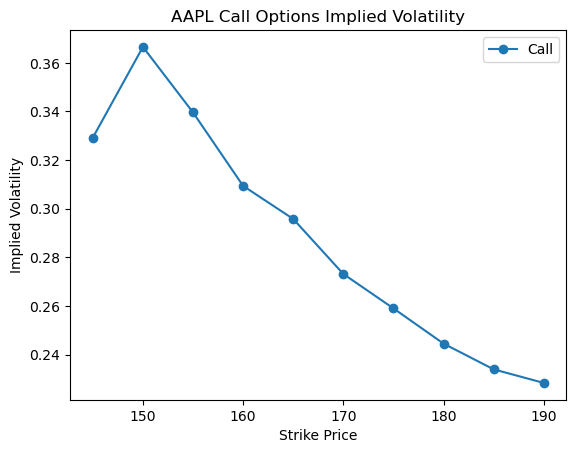

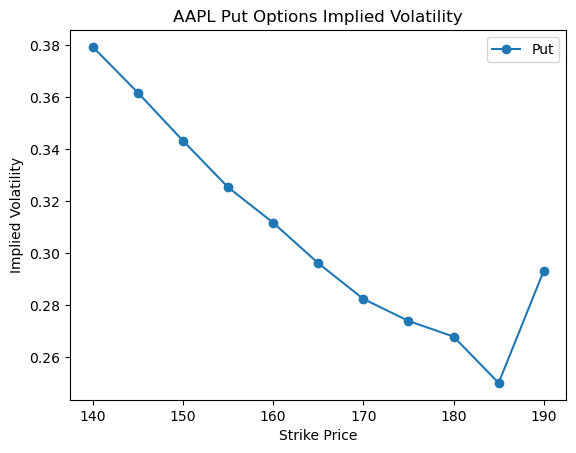

In [154]:
options['Implied Volatility'] = options.apply(lambda row: implied_volatility(row['Last Price'], current_stock_price, row['Strike'], risk_free_rate, coupon, time_to_maturity, row['Type']), axis=1)

# Separate call and put options data
calls = options[options['Type'] == 'Call']
# print(calls)
puts = options[options['Type'] == 'Put']
print(puts)

# Plot implied volatility vs strike price for call options
plt.plot(calls['Strike'], calls['Implied Volatility'], 'o-', label='Call')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('AAPL Call Options Implied Volatility')
plt.legend()
plt.show()

# Plot implied volatility vs strike price for put options
plt.plot(puts['Strike'], puts['Implied Volatility'], 'o-', label='Put')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('AAPL Put Options Implied Volatility')
plt.legend()
plt.show()

## Problem 3 ##

In [155]:
# current_stock_price = 170.15
current_stock_price = 170.15
current_date = datetime(2023, 10, 30)
expiration_date = datetime(2023, 12, 15)
# risk_free_rate = 0.0525
risk_free_rate = 0.0525
coupon = 0.0057  # Continuously Compounding Coupon
T = (expiration_date - current_date).days/365

print(f"Time to maturing: {T} days")

Time to maturing: 0.12602739726027398 days


In [188]:
portfolio = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/assignment 1/solutions/number2/FinTech545_Fall2023_Ibrahim/week06 copy_answers/problem3.csv')

portfolio['Option Value'] = 0

# portfolio.head()

daily_price = pd.read_csv('/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/assignment 1/solutions/number2/FinTech545_Fall2023_Ibrahim/week06 copy_answers/DailyPrices.csv')

daily_price.head()

,Date,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
0,2022-09-01,388.679565,157.028442,257.908386,127.820000,139.243423,109.739998,277.160004,110.550003,282.429993,...,282.124664,136.138718,36.036259,123.325203,70.653595,424.766022,158.011505,46.662727,40.990002,249.972107
1,2022-09-02,384.581177,154.891113,253.609909,127.510002,136.346054,107.849998,270.209991,108.680000,277.670013,...,281.791626,134.696564,37.229321,122.039116,69.294113,422.966797,155.602798,46.748875,40.490002,243.384186
2,2022-09-06,383.130066,153.618668,250.826813,126.110001,134.527710,106.809998,274.420013,107.480003,276.589996,...,280.483856,135.834595,36.703716,122.108894,69.422180,419.574921,155.464035,46.155418,40.380001,246.615067
3,2022-09-07,390.013000,155.040237,255.620483,129.479996,137.056152,109.449997,283.700012,110.480003,281.040009,...,285.154480,138.591293,36.408989,126.814598,70.722557,424.726715,158.992813,46.547867,41.470001,251.776749
4,2022-09-08,392.562256,153.549088,256.046387,129.820007,139.814484,108.379997,289.260010,109.419998,283.339996,...,285.852631,140.523956,37.499485,128.828476,72.072182,431.766174,157.099579,47.763493,42.709999,253.882172


In [189]:
portfolio.head()

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Option Value
0,Straddle,Option,AAPL,1,Call,12/15/2023,170.0,7.21,0
1,Straddle,Option,AAPL,1,Put,12/15/2023,170.0,6.16,0
2,SynLong,Option,AAPL,1,Call,12/15/2023,170.0,7.21,0
3,SynLong,Option,AAPL,-1,Put,12/15/2023,170.0,6.16,0
4,CallSpread,Option,AAPL,1,Call,12/15/2023,170.0,7.21,0


In [190]:
# def black_scholes_call(S, K, T, r, q, sigma):
#     return black_scholes(S, K, T, r, q, sigma, option_type='call')

# def black_scholes_put(S, K, T, r, q, sigma):
#     return black_scholes(S, K, T, r, q, sigma, option_type='put')

# Constants
S = 170.15
r = 0.0525
q = 0.0057  # Continuously Compounding Coupon
sigma = 0.5
current_date = datetime(2023, 10, 30)
expiration_date = datetime(2023, 12, 15)
T = (expiration_date - current_date).days / 365

# Calculate option values

for i in range(len(portfolio)):
    if portfolio['OptionType'][i] == 'Call':
        print(portfolio['OptionType'][i])
        portfolio['Option Value'][i] = black_scholes(S, portfolio['Strike'][i], T, r, q, sigma, option_type='call')
    else:
        portfolio['Option Value'][i] = black_scholes(S, portfolio['Strike'][i], T, r, q, sigma, option_type='put')

# print(portfolio['Call Value'])
    

# portfolio['Call Value'] = portfolio.apply(lambda row: black_scholes(S, row['Strike'], T, r, q, sigma, option_type='call'), axis=1)
print(portfolio['Option Value'])

print(portfolio)



Call
Call
Call
Call
Call
Call
0     12.634185
1     11.363104
2     12.634185
3     11.363104
4     12.634185
5      8.486169
6     11.363104
7      6.878168
8           NaN
9     12.634185
10    11.363104
11          NaN
12    10.404431
13          NaN
14     8.953138
Name: Option Value, dtype: float64
       Portfolio    Type Underlying  Holding OptionType ExpirationDate  \
0       Straddle  Option       AAPL        1       Call     12/15/2023   
1       Straddle  Option       AAPL        1        Put     12/15/2023   
2        SynLong  Option       AAPL        1       Call     12/15/2023   
3        SynLong  Option       AAPL       -1        Put     12/15/2023   
4     CallSpread  Option       AAPL        1       Call     12/15/2023   
5     CallSpread  Option       AAPL       -1       Call     12/15/2023   
6      PutSpread  Option       AAPL        1        Put     12/15/2023   
7      PutSpread  Option       AAPL       -1        Put     12/15/2023   
8          Stock   Stock     

/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_25398/1899076200.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio['Option Value'][i] = black_scholes(S, portfolio['Strike'][i], T, r, q, sigma, option_type='call')


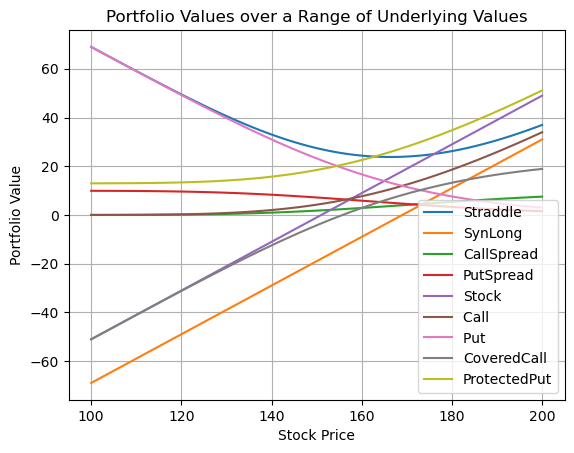

In [192]:
stock_prices = np.linspace(100, 200, 100)
portfolio_values = {}

for portfolio in data['Portfolio'].unique():
    portfolio_positions = data[data['Portfolio'] == portfolio]
    portfolio_values[portfolio] = []

    for S in stock_prices:
        portfolio_value = 0

        for _, position in portfolio_positions.iterrows():
            if position['Type'] == 'Stock':
                portfolio_value += position['Holding'] * (S - S0)
            elif position['OptionType'] == 'Call':
                portfolio_value += position['Holding'] * (black_scholes_call(S, position['Strike'], T, r, q, sigma) - position['OptionValue'])
            elif position['OptionType'] == 'Put':
                portfolio_value += position['Holding'] * (black_scholes_put(S, position['Strike'], T, r, q, sigma) - position['OptionValue'])

        portfolio_values[portfolio].append(portfolio_value)

# Plot the portfolio values
for portfolio, values in portfolio_values.items():
    plt.plot(stock_prices, values, label=portfolio)

plt.xlabel('Stock Price')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Values over a Range of Underlying Values')
plt.legend()
plt.grid()
plt.show()
